<a href="https://colab.research.google.com/github/Ahmedr57/EDA-on-FBI-Gun-Data/blob/main/EDA_FBI_Gun_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align = center>Muhammad Ahmed Raza <br>
</h2>

<h1 align = center>Project: Investigate a Dataset (FBI Gun Data)</h1>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
<h4>Research Questions</h4>
<ul style="list-style-type:square;">
  <li>On average, How many peoples purchase Guns from 1998-2017 in State of Alabama?</li>
  <li>What is the trend of buying guns in State of Alabama?</li>
  <li>In which year more guns were purchased?</li>
  <li>Which State has the most purchased guns in 2016?</li>
</ul>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
df = pd.read_csv(r"gun_data.csv")
print(df.head())

     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \


### Data Cleaning (Guns Data)

In [ ]:
df.describe

<bound method NDFrame.describe of          month          state   permit  permit_recheck  handgun  long_gun  \
0      2017-09        Alabama  16717.0             0.0   5734.0    6320.0   
1      2017-09         Alaska    209.0             2.0   2320.0    2930.0   
2      2017-09        Arizona   5069.0           382.0  11063.0    7946.0   
3      2017-09       Arkansas   2935.0           632.0   4347.0    6063.0   
4      2017-09     California  57839.0             0.0  37165.0   24581.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

        other  multiple  admin  prepawn_h

In [ ]:
print(df.shape)

(12485, 27)


In [ ]:
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [ ]:
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

<h5>Through the command below I am going to drop all the columns which are not of my intrest.</h5>

In [ ]:
Guns_Data = df.drop(['permit_recheck', 'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis = 1)
print(Guns_Data.head())

     month       state   permit  handgun  long_gun  multiple  totals
0  2017-09     Alabama  16717.0   5734.0    6320.0       317   32019
1  2017-09      Alaska    209.0   2320.0    2930.0       160    6303
2  2017-09     Arizona   5069.0  11063.0    7946.0       631   28394
3  2017-09    Arkansas   2935.0   4347.0    6063.0       366   17747
4  2017-09  California  57839.0  37165.0   24581.0         0  123506


<h5>Than I checked how many columns are null. So I can perform the required task to tidy my data.</h5>

In [ ]:
Guns_Data.isnull().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
multiple     0
totals       0
dtype: int64

<h5>Later I droped all the null values which were not essential and by removing them, we will not loose our important Observations.</h5>

In [ ]:
Guns_Data = Guns_Data.dropna()
Guns_Data.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
multiple    0
totals      0
dtype: int64

In [ ]:
Guns_Data.info()
Guns_Data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12461 non-null  object 
 1   state     12461 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12461 non-null  float64
 4   long_gun  12461 non-null  float64
 5   multiple  12461 non-null  int64  
 6   totals    12461 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 778.8+ KB


month        object
state        object
permit      float64
handgun     float64
long_gun    float64
multiple      int64
totals        int64
dtype: object

In [ ]:
UGuns_Data = df.drop(['permit_recheck', 'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis = 1)
UGuns_Data = UGuns_Data.dropna()
UGuns_Data.head()

,month,state,permit,handgun,long_gun,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,123506


<h5>In this line of code I have changed Data types of some columns to perform Analysis.</h5>

In [ ]:
Months = Guns_Data.month.str.replace('/', '-')

In [ ]:
Guns_Data['month'] = pd.to_datetime(Months)
Guns_Data['permit'] = Guns_Data.permit.astype('int64')
Guns_Data['handgun'] = Guns_Data.handgun.astype('int64')
Guns_Data['long_gun'] = Guns_Data.long_gun.astype('int64')

In [ ]:
Guns_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12461 non-null  datetime64[ns]
 1   state     12461 non-null  object        
 2   permit    12461 non-null  int64         
 3   handgun   12461 non-null  int64         
 4   long_gun  12461 non-null  int64         
 5   multiple  12461 non-null  int64         
 6   totals    12461 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 778.8+ KB


<h5>Than I Set the month column as Index.</h5>

In [ ]:
Guns_Data = Guns_Data.set_index('month')
Guns_Data

,state,permit,handgun,long_gun,multiple,totals
month,,,,,,
2017-09-01,Alabama,16717,5734,6320,317,32019
2017-09-01,Alaska,209,2320,2930,160,6303
2017-09-01,Arizona,5069,11063,7946,631,28394
2017-09-01,Arkansas,2935,4347,6063,366,17747
2017-09-01,California,57839,37165,24581,0,123506
...,...,...,...,...,...,...
1998-11-01,Virginia,0,14,2,8,24
1998-11-01,Washington,1,65,286,8,361
1998-11-01,West Virginia,3,149,251,5,408


<h5>I wrote this line of code to get the names of States present in Dataset.</h5>

In [ ]:
States = Guns_Data['state'].unique()
States = list(States)
print(States)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


<h5>By writing this code, I created a dictionary of name All states, in which I placed name of states as key and all there data with respect to its state in values.</h5>

In [ ]:
All_States={}
for x in States:
    y = Guns_Data[Guns_Data['state'] == x]
    All_States[x]=y
    print(y)

              state  permit  handgun  long_gun  multiple  totals
month                                                           
2017-09-01  Alabama   16717     5734      6320       317   32019
2017-08-01  Alabama   19733     6289      6045       311   35038
2017-07-01  Alabama   18042     6046      4790       258   31474
2017-06-01  Alabama   19508     8275      4782       334   35687
2017-05-01  Alabama   18538     7198      4559       309   33331
...             ...     ...      ...       ...       ...     ...
1999-03-01  Alabama       0     9151      9991       282   19424
1999-02-01  Alabama       0     9630     10654       299   20583
1999-01-01  Alabama       0     7516     10311       222   18049
1998-12-01  Alabama       0    10118     25120       268   35506
1998-11-01  Alabama       0      449       603        10    1062

[227 rows x 6 columns]
             state  permit  handgun  long_gun  multiple  totals
month                                                          
201

               state  permit  handgun  long_gun  multiple  totals
month                                                            
2017-09-01  Illinois   15712    18290     10201       814  116449
2017-08-01  Illinois   17053    19807     11333       779  126921
2017-07-01  Illinois   13652    18417      9895       765  108000
2017-06-01  Illinois   14883    21394      9491       790  113889
2017-05-01  Illinois   14857    22244      9252       774  121746
...              ...     ...      ...       ...       ...     ...
1999-03-01  Illinois   24876     8727      9286       200   43089
1999-02-01  Illinois   22038     8106      8088       217   38449
1999-01-01  Illinois   22165     6131      6989       174   35459
1998-12-01  Illinois   24022     6207     11032       194   41455
1998-11-01  Illinois       4        0        18         0      22

[227 rows x 6 columns]
              state  permit  handgun  long_gun  multiple  totals
month                                                

                    state  permit  handgun  long_gun  multiple  totals
month                                                                 
2017-09-01  New Hampshire    2795     4410      3248         3   10689
2017-08-01  New Hampshire    2065     4164      2885         3    9313
2017-07-01  New Hampshire    1451     4228      2427         4    8333
2017-06-01  New Hampshire    1659     4836      2412         2    9184
2017-05-01  New Hampshire    1503     4614      2472         5    8868
...                   ...     ...      ...       ...       ...     ...
1999-03-01  New Hampshire       0       59      1801         5    1865
1999-02-01  New Hampshire       0       44      1405        16    1465
1999-01-01  New Hampshire       0       35      1415        14    1464
1998-12-01  New Hampshire       0      104      2272        11    2387
1998-11-01  New Hampshire       0        8        46         1      55

[227 rows x 6 columns]
                 state  permit  handgun  long_gun  mu

[227 rows x 6 columns]
                  state  permit  handgun  long_gun  multiple  totals
month                                                               
2017-09-01  Puerto Rico       0      619       123        22     791
2017-08-01  Puerto Rico       0     1169       227        34    1490
2017-07-01  Puerto Rico       0     1115       187        22    1381
2017-06-01  Puerto Rico       0     1339       211        35    1631
2017-05-01  Puerto Rico       0     1279       217        31    1600
...                 ...     ...      ...       ...       ...     ...
1999-03-01  Puerto Rico       0      349        88         8     445
1999-02-01  Puerto Rico       0      270        64         4     338
1999-01-01  Puerto Rico       0      304        94         4     402
1998-12-01  Puerto Rico       0      401       101         9     511
1998-11-01  Puerto Rico       0        1         1         0       2

[227 rows x 6 columns]
                   state  permit  handgun  long_gun  mul

[227 rows x 6 columns]
              state  permit  handgun  long_gun  multiple  totals
month                                                           
2017-09-01  Wyoming     280     1337      2015        97    4281
2017-08-01  Wyoming     408     1411      1762        86    4111
2017-07-01  Wyoming     279     1231      1395        77    3398
2017-06-01  Wyoming     350     1520      1544        85    3975
2017-05-01  Wyoming     435     1589      1578        91    4128
...             ...     ...      ...       ...       ...     ...
1999-03-01  Wyoming     171      986      1574        45    2776
1999-02-01  Wyoming     150      831      1584        77    2643
1999-01-01  Wyoming      67      668      1401        44    2180
1998-12-01  Wyoming     113      925      2303        38    3379
1998-11-01  Wyoming       8       45        49         5     107

[227 rows x 6 columns]


<h5>I selected one state to start working on it.</h5>

In [ ]:
State_Alabama = All_States['Alabama']
State_Alabama= State_Alabama.drop(['state'], axis=1)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (On average, How many peoples purchase Guns from 1998-2017 in State of Alabama?)
<h5>On average, How many peoples purchase Hand Guns from 1998-2017 in State of Alabama?</h5>

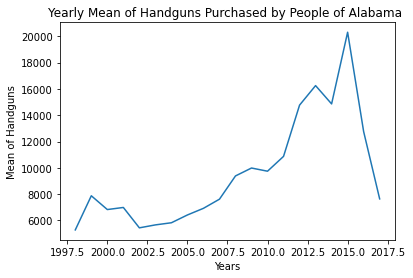

In [ ]:
yearly_handguns = State_Alabama.groupby(State_Alabama.index.year).handgun.mean()
yearly_handguns.plot()
plt.xlabel('Years')
plt.ylabel('Mean of Handguns')
plt.title('Yearly Mean of Handguns Purchased by People of Alabama ')
plt.show()

<h5>Answer:</h5>
<p>From the plot above we can see that in the beginning there were very fewer purchases of Hand Guns but as time passes the trend of handguns increased and in 2015, it reached its maximum value, and then we see a drastic decrease in purchasing.</p>

<h5>On average, How many peoples purchase Long Guns from 1998-2017 in State of Alabama?</h5>

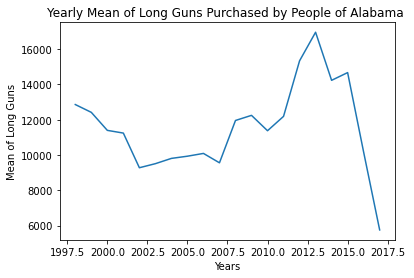

In [ ]:
yearly_long_guns = State_Alabama.groupby(State_Alabama.index.year).long_gun.mean()
yearly_long_guns.plot()
plt.xlabel('Years')
plt.ylabel('Mean of Long Guns')
plt.title('Yearly Mean of Long Guns Purchased by People of Alabama ')
plt.show()

<h5>Answer:</h5>
<p>From the plot above we can see that in the beginning there were very some purchases of Long Guns but as time passes the trend of longguns increased and in 2012, it reached its maximum value, and then we see a bit of decrease and then a drastic decrease in purchasing.</p>

<h5>On average, How many peoples purchase Guns from 1998-2017 in State of Alabama?</h5>

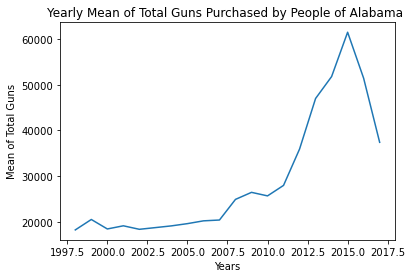

In [ ]:
yearly_total_guns = State_Alabama.groupby(State_Alabama.index.year).totals.mean()
yearly_total_guns.plot()
plt.xlabel('Years')
plt.ylabel('Mean of Total Guns')
plt.title('Yearly Mean of Total Guns Purchased by People of Alabama ')
plt.show()

<h5>Answer:</h5>
<p>From the plot above we can see that in the beginning there were very fewer purchases of Guns but as time passes the trend of handguns increased and in 2015, it reached its maximum value, and then we see a drastic decrease in purchasing.</p>

### Research Question 2 (What is the trend of buying guns in State of Alabama?)
<h5>The Graph below shows the trends of Handguns, Longguns, Totals annualy.</h5>

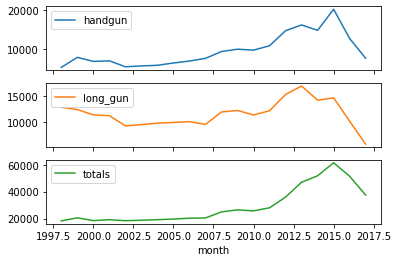

In [ ]:
yearly = pd.concat([yearly_handguns, yearly_long_guns, yearly_total_guns], axis = 1, join = 'inner')
yearly.plot(subplots = True)
plt.show()

<h5>Answer:</h5>
<p>From the plots above we can see that in the beginning there was more trend of buying long guns than handguns, but as time passes people got interested in handguns. As we can see that in the end the total trend of guns decreases.</p>

### Research Question 3 (In which year more guns were purchased?
<h5>The code below plots the graph which show the trend of guns purchased in all States Annualy.</h5>

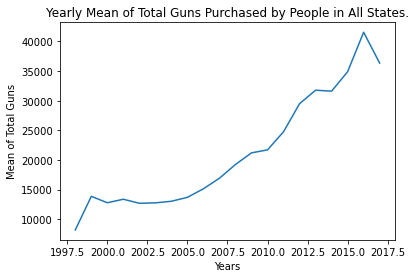

In [ ]:
GD = Guns_Data.groupby(Guns_Data.index.year).totals.mean()
GD.plot()
plt.xlabel('Years')
plt.ylabel('Mean of Total Guns')
plt.title('Yearly Mean of Total Guns Purchased by People in All States.')
plt.show()

<h5>Answer:</h5>
<p>From the plots above we can see that in 2016 there were more purchases of gun then in any other year.</p>

### Research Question 4 (Which State has the most purchased guns in 2016s?
<h5>Thescode below extracts all data of 2016-06 month of all States.</h5>

In [ ]:
Guns_2016 = UGuns_Data[UGuns_Data['month'] == '2016-06']
Guns_2016.head()

,month,state,permit,handgun,long_gun,multiple,totals
825,2016-06,Alabama,24802.0,9146.0,7273.0,431,44976
826,2016-06,Alaska,290.0,2987.0,3204.0,185,7406
827,2016-06,Arizona,6371.0,12942.0,8614.0,685,32540
828,2016-06,Arkansas,5233.0,5454.0,4574.0,333,18779
829,2016-06,California,81628.0,43042.0,37512.0,0,173846


<h5>The code below shows the top 15 countries with the higher rate of gun purchase.</h5>

In [ ]:
Guns_2016 = Guns_2016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)
Guns_2016['state']

843        Kentucky
829      California
839        Illinois
834         Florida
871           Texas
840         Indiana
865    Pennsylvania
862            Ohio
870       Tennessee
876      Washington
Name: state, dtype: object

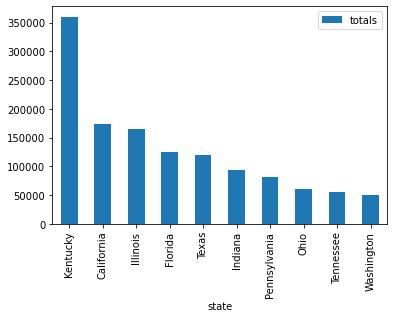

In [ ]:
Guns_2016.plot(x='state', y='totals', kind='bar');

<h5>Answer:</h5>
<h6>States with higher gun purchase rate.</h6>
<ul style="list-style-type:square;">
  <li>Kentucky</li>
  <li>California</li>
  <li>Illinois</li>
  <li>Florida</li>
  <li>Texas</li>
  <li>Indiana</li>
  <li>Pennsylvania</li>
  <li>Ohio</li>
  <li>Tennessee</li>
  <li>Washington</li>
</ul>

<a id='conclusions'></a>
## Conclusions

<p>In <b>Conclusion</b>, The peolpe of State of Albama were more intrested in long guns in the begining than in hanguns. But as the time passes the trend of handguns increased and we see a increase in the purchase of handguns. But at a certian time the trend reached it's peak in 2016 and than we see that people stopped buying weopons. We do not the reason for this drastic decrease.According to the data Kentucky was the State in which more weapons were purchased than any other State in 2016. 2016 was also the year in which more guns were purchased than in any year. </p>
<p>In <b>Limitations</b>, we don't have much data to analyze the decrease of guns after a certain peak. We don't have data about the crime rate in states. so we can relate the crime ratio of crime rates with the states having more guns. Does issuing more guns in a state lead to more crime rate or less?</p>